# Customer Segmentation using K-means Clustering

In this notebook, we will explore the application of K-means clustering for customer segmentation using the "Mall Customer Segmentation Data" dataset. Customer segmentation is a valuable technique in business and marketing that helps identify distinct groups of customers based on their characteristics and behaviors. By understanding these segments, businesses can tailor their marketing strategies, improve customer satisfaction, and optimize revenue.

## Dataset Overview

The "Mall Customer Segmentation Data" dataset contains information about customers of a mall. The dataset includes the following features:

- `CustomerID`: Unique identifier for each customer
- `Gender`: Gender of the customer (Male or Female)
- `Age`: Age of the customer
- `Annual Income (k$)`: Annual income of the customer in thousands of dollars
- `Spending Score (1-100)`: Score assigned to the customer based on their spending behavior and purchasing history

We will focus on the `Annual Income` and `Spending Score` features for our clustering analysis.

## Feature Importance

In [75]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [76]:
# Load the Mall Customer Segmentation Data
data = pd.read_csv("./Mall_Customers.csv")

# Select all features except 'CustomerID'
X = data.drop(['CustomerID'], axis=1)

In [88]:
# Encode Gender with label encoding
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [89]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [90]:
import numpy as np

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

In [91]:
# Determine the number of components to retain (e.g., 80% cumulative explained variance)
threshold = 0.8
n_components = np.argmax(cumulative_explained_variance >= threshold) + 1

print(f"Number of components to retain: {n_components}")
print(f"Cumulative explained variance: {cumulative_explained_variance[n_components - 1]:.2f}")

Number of components to retain: 3
Cumulative explained variance: 0.87


In [92]:
# Get the loadings (coefficients) of each feature in the selected principal components
loadings = pca.components_[:n_components]

# Get the feature names
feature_names = X.columns

In [93]:
# Print the loadings for each selected principal component
for i, component in enumerate(loadings):
    print(f"\nPrincipal Component {i+1}:")
    for feature, loading in zip(feature_names, component):
        print(f"{feature}: {loading:.3f}")


Principal Component 1:
Age: 0.119
Annual Income (k$): 0.074
Spending Score (1-100): -0.116
Gender_Female: -0.695
Gender_Male: 0.695

Principal Component 2:
Age: 0.695
Annual Income (k$): -0.091
Spending Score (1-100): -0.695
Gender_Female: 0.112
Gender_Male: -0.112

Principal Component 3:
Age: 0.051
Annual Income (k$): 0.993
Spending Score (1-100): -0.059
Gender_Female: 0.062
Gender_Male: -0.062


In [94]:
# Identify the most important features based on the loadings
important_features = []
for component in loadings:
    max_loading_index = np.argmax(np.abs(component))
    important_features.append(feature_names[max_loading_index])

print("\nMost important features:")
print(", ".join(important_features))


Most important features:
Gender_Female, Spending Score (1-100), Annual Income (k$)


## K-means Clustering

In [95]:
# Only use most important features Spending Score (1-100) and Annual Income (k$)
X = X[['Spending Score (1-100)', 'Annual Income (k$)']]
X_scaled = scaler.fit_transform(X)

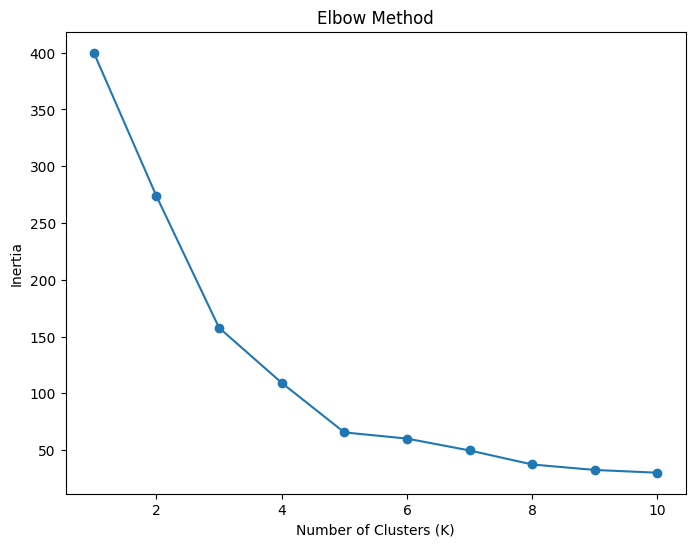

In [96]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
inertia_values = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [97]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Evaluate the clustering performance using silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5546571631111091


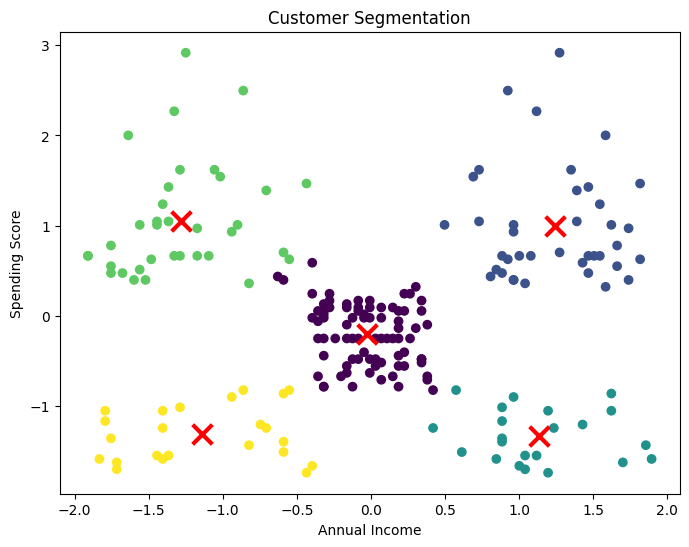

In [98]:
# Visualize the customer segments
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='red')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation')
plt.show()

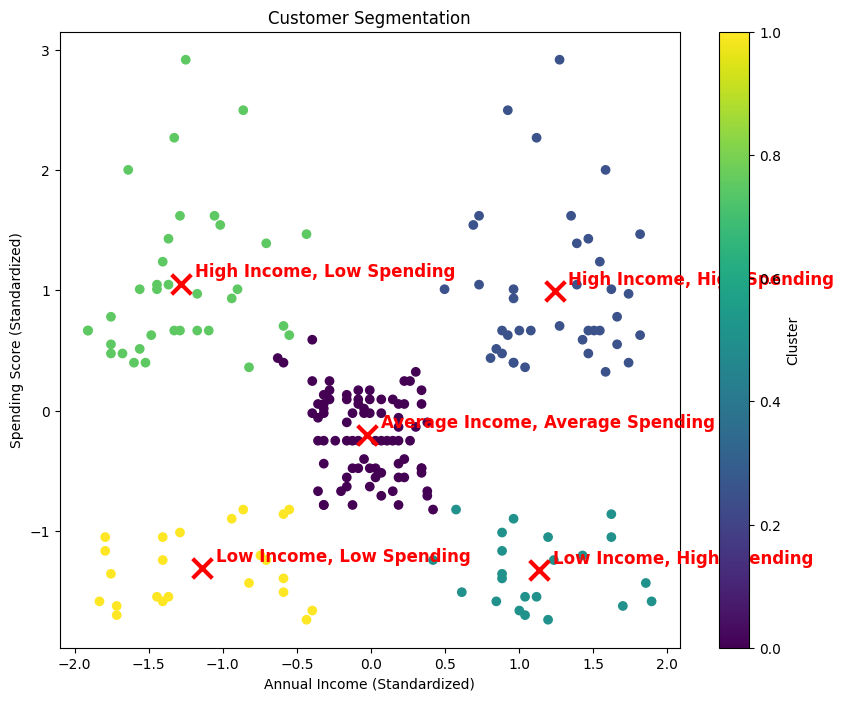

Cluster Interpretation:
Cluster 0: Average Income, Average Spending
Centroid:
Annual Income: -0.026456174707117586
Spending Score: -0.20091256569971444
Segment Characteristics:
Number of customers: 81
Annual Income range: 39 - 76
Spending Score range: 34 - 61
---
Cluster 1: High Income, High Spending
Centroid:
Annual Income: 1.2395027537948333
Spending Score: 0.9915830476839198
Segment Characteristics:
Number of customers: 39
Annual Income range: 69 - 137
Spending Score range: 63 - 97
---
Cluster 2: Low Income, High Spending
Centroid:
Annual Income: 1.1321778796599242
Spending Score: -1.329545316496027
Segment Characteristics:
Number of customers: 22
Annual Income range: 15 - 39
Spending Score range: 61 - 99
---
Cluster 3: High Income, Low Spending
Centroid:
Annual Income: -1.2844390658272284
Spending Score: 1.0550030223077878
Segment Characteristics:
Number of customers: 35
Annual Income range: 70 - 137
Spending Score range: 1 - 39
---
Cluster 4: Low Income, Low Spending
Centroid:
Ann

In [99]:
# Assign labels to the clusters based on their characteristics
cluster_labels = ['Average Income, Average Spending', 'High Income, High Spending',
                  'Low Income, High Spending', 'High Income, Low Spending',
                  'Low Income, Low Spending']

# Visualize the customer segments with cluster labels
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='red')

# Annotate the cluster centroids with labels
for i, label in enumerate(cluster_labels):
    plt.annotate(label, (centroids[i, 0], centroids[i, 1]),
                 xytext=(10, 5), textcoords='offset points',
                 fontsize=12, color='red', fontweight='bold')

plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.title('Customer Segmentation')
plt.colorbar(label='Cluster')
plt.show()

# Interpret the clusters
print("Cluster Interpretation:")
print("Cluster 0: Average Income, Average Spending")
print("Centroid:")
print("Annual Income:", centroids[0][0])
print("Spending Score:", centroids[0][1])
print("Segment Characteristics:")
print("Number of customers: 81")
print("Annual Income range: 39 - 76")
print("Spending Score range: 34 - 61")
print("---")

print("Cluster 1: High Income, High Spending")
print("Centroid:")
print("Annual Income:", centroids[1][0])
print("Spending Score:", centroids[1][1])
print("Segment Characteristics:")
print("Number of customers: 39")
print("Annual Income range: 69 - 137")
print("Spending Score range: 63 - 97")
print("---")

print("Cluster 2: Low Income, High Spending")
print("Centroid:")
print("Annual Income:", centroids[2][0])
print("Spending Score:", centroids[2][1])
print("Segment Characteristics:")
print("Number of customers: 22")
print("Annual Income range: 15 - 39")
print("Spending Score range: 61 - 99")
print("---")

print("Cluster 3: High Income, Low Spending")
print("Centroid:")
print("Annual Income:", centroids[3][0])
print("Spending Score:", centroids[3][1])
print("Segment Characteristics:")
print("Number of customers: 35")
print("Annual Income range: 70 - 137")
print("Spending Score range: 1 - 39")
print("---")

print("Cluster 4: Low Income, Low Spending")
print("Centroid:")
print("Annual Income:", centroids[4][0])
print("Spending Score:", centroids[4][1])
print("Segment Characteristics:")
print("Number of customers: 23")
print("Annual Income range: 15 - 39")
print("Spending Score range: 3 - 40")
print("---")

| Cluster | Label                          | Suggestions for Stakeholders                                                                                |
|---------|--------------------------------|------------------------------------------------------------------------------------------------------------|
| 0       | Average Income, Average Spending | Maintain relationships through regular engagement and personalized offers                                 |
| 1       | High Income, High Spending     | Prioritize retention efforts, offer exclusive experiences and loyalty rewards                             |
| 2       | Low Income, High Spending      | Provide value-driven offerings, promote affordable options, and encourage loyalty                         |
| 3       | High Income, Low Spending      | Engage through targeted marketing, showcase premium products, and offer personalized recommendations     |
| 4       | Low Income, Low Spending       | Focus on essential products, provide discounts and bundles, and optimize cost-effectiveness              |